# Model Comparisons

Comparing the DDM to other congitive models

In [1]:
# Environment setup
%matplotlib inline
%cd /lang_dec
# Imports
import warnings; warnings.filterwarnings('ignore')
import hddm
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bayesian_bootstrap.bootstrap as bootstrap
from utils import model_tools, signal_detection

/Users/celefthe/Programming/projects/language_decision


In [2]:
# Import pilot models
pilot_data = hddm.load_csv('/lang_dec/data/pilot_clean.csv')
pilot_model = hddm.HDDM(pilot_data, depends_on={'v': 'stim'}, bias=True)
pilot_model.load_db(dbname='language_decision/models/pilot', db='txt')

#pilot_model_threshold = hddm.HDDM(pilot_data, depends_on={'v': 'stim', 'a': 'stim'})
#pilot_model_threshold.load_db(dbname='language_decision/models/pilot_threshold', db='txt')

In [3]:
# Import control models
controls_data = hddm.load_csv('/lang_dec/data/controls_clean.csv')
controls_model = hddm.HDDM(controls_data, depends_on={'v': 'stim'}, bias=True)
controls_model.load_db(dbname='language_decision/models/controls', db='txt')

#controls_model_threshold = hddm.HDDM(controls_data, depends_on={'v': 'stim', 'a': 'stim'}, bias=True)
#controls_model_threshold.load_db(dbname='language_decision/models/controls_threshold', db='txt')

In [4]:
# Import patient models
patients_data = hddm.load_csv('/lang_dec/data/patients_clean.csv')
patients_model = hddm.HDDM(patients_data, depends_on={'v': 'stim'}, bias=True)
patients_model.load_db(dbname='language_decision/models/patients', db='txt')

#patients_model_threshold = hddm.HDDM(patients_data, depends_on={'v': 'stim', 'a': 'stim'})
#patients_model_threshold.load_db(dbname='language_decision/models/patients_threshold', db='txt')

## DDM vs Signal Detection Theory

Comparing DDM to Signal Detection - does d' correlate with DDM parameters?

In [5]:
def get_d_primes(dataset, stim1, stim2, include_id=False):
    d_primes = dict()
    subject_ids = set(dataset.subj_idx)
    for subject_id in subject_ids:
        stim1_data = dataset.loc[
            dataset['subj_idx'] == subject_id].loc[
            dataset['stim'] == str(stim1)]
        stim1_trials = len(stim1_data)
        hits = len(stim1_data.loc[
            dataset['response'] == 1.0])
        
        stim2_data = dataset.loc[
            dataset['subj_idx'] == subject_id].loc[
            dataset['stim'] == str(stim2)]
        stim2_trials = len(stim2_data)
        
        fas = len(stim2_data.loc[
            dataset['response'] == 0.0])
        
        if not stim1_trials or not stim2_trials:
            d_primes[subject_id] = None # N/A placeholder value
            continue
        
        d_prime = signal_detection.signal_detection(
            n_stim1=stim1_trials, 
            n_stim2=stim2_trials, 
            hits=hits, 
            false_alarms=fas)['d_prime']
        d_primes[subject_id] = d_prime
       
    if not include_id:
        return list(d_primes.values())
    return d_primes

## d' distributions

### Pilot

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  7.,  0.,  0.,  7.]),
 array([ 3.33500058,  3.42710957,  3.51921856,  3.61132755,  3.70343654,
         3.79554553,  3.88765451,  3.9797635 ,  4.07187249,  4.16398148,
         4.25609047]),
 <a list of 10 Patch objects>)

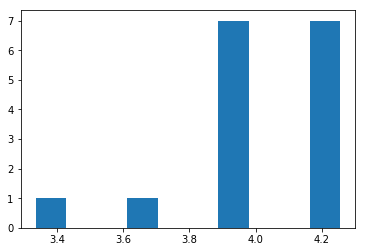

In [21]:
plt.hist(get_d_primes(pilot_data, 'SS', 'US'))

(array([ 5.,  0.,  0.,  0.,  1.,  5.,  0.,  0.,  0.,  5.]),
 array([ 3.62913118,  3.69182711,  3.75452304,  3.81721897,  3.8799149 ,
         3.94261082,  4.00530675,  4.06800268,  4.13069861,  4.19339454,
         4.25609047]),
 <a list of 10 Patch objects>)

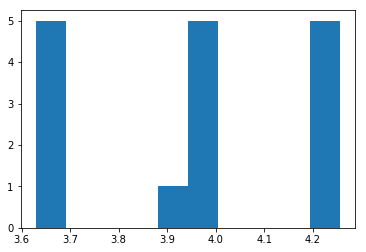

In [22]:
plt.hist(get_d_primes(pilot_data, 'SS', 'CS'))

(array([ 1.,  0.,  3.,  5.,  1.,  2.,  0.,  3.,  0.,  1.]),
 array([ 2.8013362 ,  2.94681163,  3.09228706,  3.23776248,  3.38323791,
         3.52871334,  3.67418876,  3.81966419,  3.96513962,  4.11061504,
         4.25609047]),
 <a list of 10 Patch objects>)

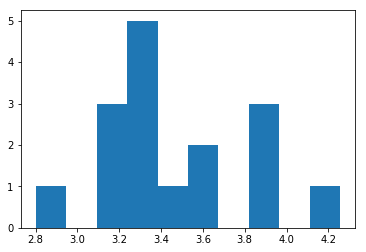

In [23]:
plt.hist(get_d_primes(pilot_data, 'SS', 'CP'))

### Controls

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  3.]),
 array([ 1.48725198,  1.73472277,  1.98219356,  2.22966435,  2.47713514,
         2.72460593,  2.97207672,  3.2195475 ,  3.46701829,  3.71448908,
         3.96195987]),
 <a list of 10 Patch objects>)

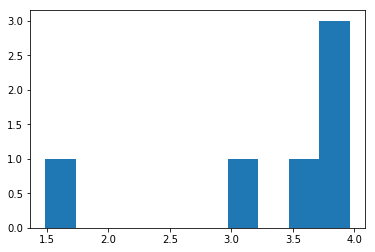

In [24]:
plt.hist(get_d_primes(controls_data, 'SS', 'US'))

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.]),
 array([ 0.93901198,  1.24130677,  1.54360156,  1.84589635,  2.14819114,
         2.45048593,  2.75278071,  3.0550755 ,  3.35737029,  3.65966508,
         3.96195987]),
 <a list of 10 Patch objects>)

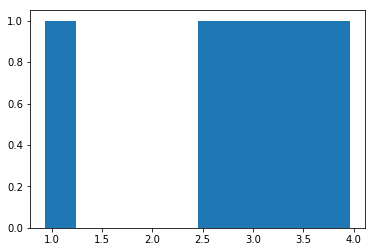

In [25]:
plt.hist(get_d_primes(controls_data, 'SS', 'CS'))

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.]),
 array([-0.25014907,  0.14164876,  0.5334466 ,  0.92524443,  1.31704227,
         1.7088401 ,  2.10063794,  2.49243577,  2.8842336 ,  3.27603144,
         3.66782927]),
 <a list of 10 Patch objects>)

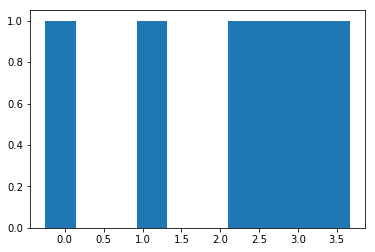

In [28]:
plt.hist(get_d_primes(controls_data, 'SS', 'CP'))

### Patients

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  4.]),
 array([-2.24897313, -1.66291731, -1.07686149, -0.49080566,  0.09525016,
         0.68130598,  1.2673618 ,  1.85341763,  2.43947345,  3.02552927,
         3.61158509]),
 <a list of 10 Patch objects>)

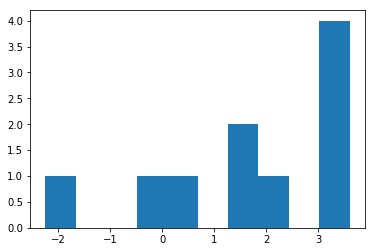

In [29]:
plt.hist(get_d_primes(patients_data, 'SS', 'US'))

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  2.,  3.]),
 array([-2.00946486, -1.55572351, -1.10198215, -0.6482408 , -0.19449945,
         0.2592419 ,  0.71298325,  1.1667246 ,  1.62046595,  2.0742073 ,
         2.52794865]),
 <a list of 10 Patch objects>)

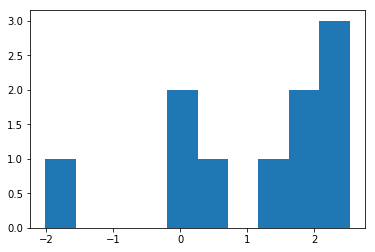

In [30]:
plt.hist(get_d_primes(patients_data, 'SS', 'CS'))

(array([ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  3.,  1.,  1.]),
 array([-0.55363827, -0.26098277,  0.03167274,  0.32432825,  0.61698375,
         0.90963926,  1.20229477,  1.49495027,  1.78760578,  2.08026129,
         2.37291679]),
 <a list of 10 Patch objects>)

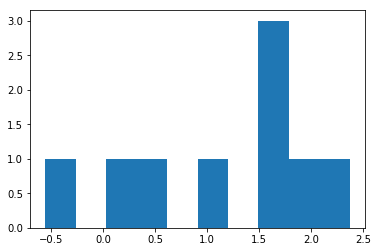

In [34]:
plt.hist(list(filter(None, get_d_primes(patients_data, 'SS', 'CP'))))

### Drift rate / d'

In [6]:
def match_dprime_to_driftrate(dataset, model, stim1, stim2):
    subject_ids = set(dataset.subj_idx)
    d_primes = get_d_primes(dataset, stim1, stim2, include_id=True)
    for subject_id in subject_ids:
        try:
            d_prime = d_primes[subject_id]
            v_stim1 = model.values['v_subj(' + stim1 + ').' + str(subject_id)]
            v_stim2 = model.values['v_subj(' + stim2 + ').' + str(subject_id)]
            v_diff = abs(v_stim2 - v_stim1)
            yield (d_prime, v_diff)
        except: 
            continue

#### SS vs US

SpearmanrResult(correlation=0.37136761744229696, pvalue=0.15671034318106991)

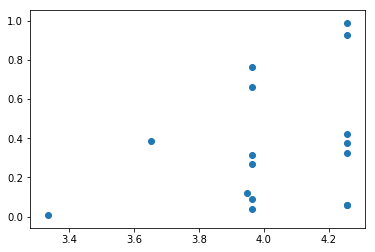

In [7]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model, 'SS', 'US')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.27322953332351235, pvalue=0.60035459042911143)

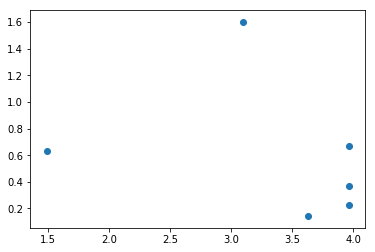

In [8]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(controls_data, controls_model, 'SS', 'US')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.29696969696969694, pvalue=0.40470167127015688)

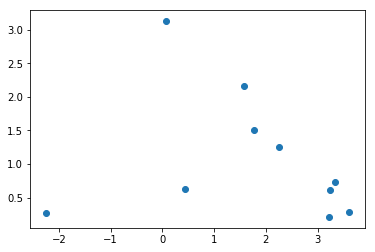

In [9]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(patients_data, patients_model, 'SS', 'US')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

#### SS vs CS

SpearmanrResult(correlation=0.19943818374307479, pvalue=0.45897847575469752)

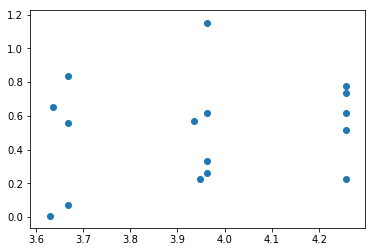

In [10]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model, 'SS', 'CS')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.4285714285714286, pvalue=0.39650145772594741)

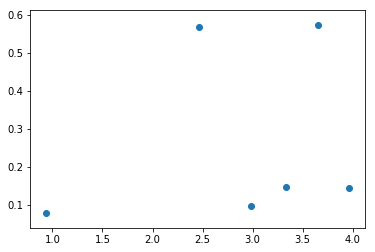

In [11]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(controls_data, controls_model, 'SS', 'CS')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.45454545454545447, pvalue=0.18690481034933201)

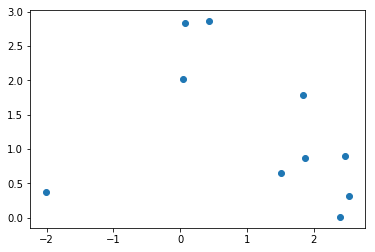

In [12]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(patients_data, patients_model, 'SS', 'CS')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

#### SS vs CP

SpearmanrResult(correlation=-0.094676213666230177, pvalue=0.7272620157241807)

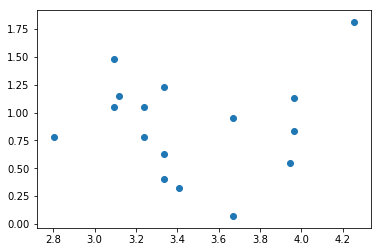

In [13]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model, 'SS', 'CP')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.59999999999999998, pvalue=0.20799999999999982)

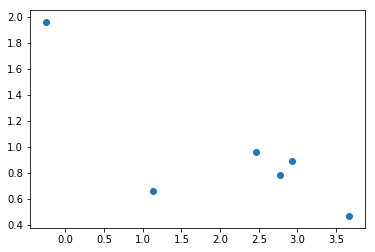

In [14]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(controls_data, controls_model, 'SS', 'CP')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.58333333333333337, pvalue=0.099185816479883226)

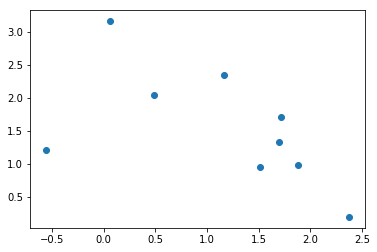

In [15]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(patients_data, patients_model, 'SS', 'CP')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

### Low d' comparisons

Compare ddm drift rate only with low d'

Ratcliff, R. (2014). Measuring psychometric functions with the diffusion model. Journal of Experimental Psychology: Human Perception and Performance, 40(2), 870-888.
http://dx.doi.org/10.1037/a0034954

Patients are the best candidates for this (SSvsCS, SSvsCP)

SpearmanrResult(correlation=-0.45454545454545447, pvalue=0.18690481034933201)

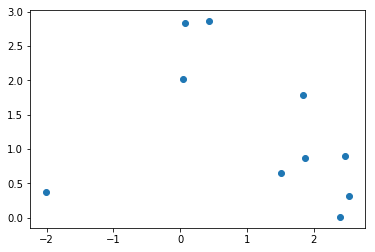

In [16]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(patients_data, 
                                                 patients_model, 'SS', 'CS')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.58333333333333337, pvalue=0.099185816479883226)

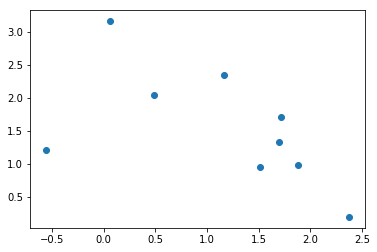

In [17]:
dprime_driftrate = np.array([*match_dprime_to_driftrate(patients_data, 
                                                 patients_model, 'SS', 'CP')])
x = dprime_driftrate[:,0]
y = dprime_driftrate[:,1]

plt.scatter(x, y)
scipy.stats.spearmanr(x, y)